In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import factorial as fact


In [ ]:
#Importing google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Question 3**

The dataset contains various queries and their associated URLs with relevance judgement
labels as relevance scores.


To complete this task, focus only on the queries with qid:4 and use the relevance judgement
labels as the relevance score.


The first objective is to create a file that rearranges the query-url pairs in order of the maximum
DCG (discounted cumulative gain). The number of such files that could be made should also be
stated.


Next, compute the nDCG (normalized discounted cumulative gain) for the dataset. This involves
calculating nDCG at position 50 and for the entire dataset.


For the third objective, assume a model that ranks URLs based on the value of feature 75,
which represents the sum of TF-IDF on the whole document. URLs with higher feature 75
values are considered more relevant. Any non-zero relevance judgement value is considered
relevant. 

Using this model, plot a Precision-Recall curve for the query "qid:4".
The curve should help visualize the trade-off between precision and recall as the model's
threshold for relevance is adjusted.

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/IR-assignment-2-data (2).txt',sep=" ",header=None)


In [ ]:
print(dataframe)

        0          1    2    3    4    5    6    7          8           9    \
0         0      qid:4  1:3  2:0  3:2  4:0  5:3  6:1        7:0  8:0.666667   
1         0      qid:4  1:3  2:0  3:3  4:0  5:3  6:1        7:0         8:1   
2         0      qid:4  1:3  2:0  3:2  4:0  5:3  6:1        7:0  8:0.666667   
3         0      qid:4  1:3  2:0  3:3  4:0  5:3  6:1        7:0         8:1   
4         1      qid:4  1:3  2:0  3:3  4:0  5:3  6:1        7:0         8:1   
...     ...        ...  ...  ...  ...  ...  ...  ...        ...         ...   
239088    0  qid:29989  1:2  2:0  3:1  4:1  5:2  6:1        7:0   8:0.50000   
239089    0  qid:29989  1:2  2:0  3:1  4:0  5:2  6:1        7:0   8:0.50000   
239090    1  qid:29989  1:2  2:0  3:2  4:2  5:2  6:1        7:0         8:1   
239091    1  qid:29989  1:2  2:0  3:2  4:0  5:2  6:1        7:0         8:1   
239092    0  qid:29989  1:2  2:1  3:1  4:1  5:2  6:1  7:0.50000   8:0.50000   

        ...       129     130        131        132

To complete this task, focus only on the queries with qid:4 and use the relevance judgement labels as the relevance score.

In [ ]:
file_dict = {}
for i in range(0, len(dataframe.index)):
    column_2_value = dataframe.at[i, 1]
    if (column_2_value == "qid:4"):
        file_dict[i] = dataframe.at[i, 0]

In [ ]:
print(file_dict)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 1, 7: 3, 8: 0, 9: 0, 10: 1, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 2, 19: 2, 20: 1, 21: 2, 22: 2, 23: 0, 24: 1, 25: 2, 26: 0, 27: 0, 28: 0, 29: 1, 30: 0, 31: 0, 32: 1, 33: 0, 34: 2, 35: 0, 36: 2, 37: 2, 38: 1, 39: 0, 40: 2, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 2, 53: 1, 54: 0, 55: 1, 56: 0, 57: 0, 58: 2, 59: 0, 60: 1, 61: 2, 62: 2, 63: 0, 64: 0, 65: 0, 66: 1, 67: 0, 68: 2, 69: 0, 70: 0, 71: 0, 72: 1, 73: 0, 74: 1, 75: 1, 76: 2, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 2, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 1, 97: 0, 98: 0, 99: 1, 100: 2, 101: 1, 102: 0}


In [ ]:
def save_query_url_file(dataframe, file_dict):
    # Create a new dataframe with only the rows that correspond to files stored in file_dict
    num_files = len(file_dict)
    new_dataframe = dataframe.drop(dataframe.index[num_files:])
    
    # Save the contents of the new dataframe to a file
    file_name = 'qid_4_file.txt'
    np.savetxt(file_name, new_dataframe.values, delimiter=' ', fmt='%s')


In [ ]:
# Call the save_query_url_file function with the given dataframe and file database
save_query_url_file(dataframe, file_dict)

In [ ]:
# Convert the file database dictionary to a list of tuples
file_tuples = list(file_dict.items())

# Sort the list of tuples in descending order based on the values of the second item in each tuple
# If the second items are equal, the first items are compared as a tiebreaker
sorted_tuples = sorted(file_tuples, key=lambda pairs: (pairs[1], pairs[0]), reverse=True)

# Update the file database with the sorted list of tuples
file_database = sorted_tuples


In [ ]:
print(file_database)

[(7, 3), (100, 2), (90, 2), (76, 2), (68, 2), (62, 2), (61, 2), (58, 2), (52, 2), (40, 2), (37, 2), (36, 2), (34, 2), (25, 2), (22, 2), (21, 2), (19, 2), (18, 2), (101, 1), (99, 1), (96, 1), (92, 1), (88, 1), (85, 1), (84, 1), (83, 1), (82, 1), (75, 1), (74, 1), (72, 1), (66, 1), (60, 1), (55, 1), (53, 1), (38, 1), (32, 1), (29, 1), (24, 1), (20, 1), (17, 1), (13, 1), (10, 1), (6, 1), (4, 1), (102, 0), (98, 0), (97, 0), (95, 0), (94, 0), (93, 0), (91, 0), (89, 0), (87, 0), (86, 0), (81, 0), (80, 0), (79, 0), (78, 0), (77, 0), (73, 0), (71, 0), (70, 0), (69, 0), (67, 0), (65, 0), (64, 0), (63, 0), (59, 0), (57, 0), (56, 0), (54, 0), (51, 0), (50, 0), (49, 0), (48, 0), (47, 0), (46, 0), (45, 0), (44, 0), (43, 0), (42, 0), (41, 0), (39, 0), (35, 0), (33, 0), (31, 0), (30, 0), (28, 0), (27, 0), (26, 0), (23, 0), (16, 0), (15, 0), (14, 0), (12, 0), (11, 0), (9, 0), (8, 0), (5, 0), (3, 0), (2, 0), (1, 0), (0, 0)]


In [ ]:

def count_final(file_database):
    # Initialize counters for each file type
    num_type_1 = 0
    num_type_2 = 0
    num_type_3 = 0
    num_type_4 = 0
    
    # Loop through the file database and count the number of files of each type
    for file_tuple in file_database:
        file_type = file_tuple[1]
        if file_type == 1:
            num_type_3 += 1
        elif file_type == 2:
            num_type_2 += 1
        elif file_type == 3:
            num_type_1 += 1
        else:
            num_type_4 += 1
    
    # Calculate the factorials of the file type counts and multiply them together to get the final answer
    factorial_1 = fact(num_type_1)
    factorial_2 = fact(num_type_2)
    factorial_3 = fact(num_type_3)
    factorial_4 = fact(num_type_4)
    answer = factorial_1 * factorial_2 * factorial_3 * factorial_4
    
    return answer

count_final(file_database)


19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000

Next, compute the nDCG (normalized discounted cumulative gain) for the dataset. This involves calculating nDCG at position 50 and for the entire dataset.

In [ ]:
import math

def calculate_score(files, num_files):
    # Initialize the output score to the score of the first file
    output_score = files[0][1]
    
    # Loop through the remaining files and calculate their contributions to the final score
    for i in range(1, num_files):
        file_score = files[i][1]
        file_rank = i + 1
        file_contribution = file_score / math.log2(file_rank)
        output_score += file_contribution
    
    return output_score


In [ ]:
# Get the lengths of the two file sets
num_files_a = len(file_database)
num_files_b = len(file_tuples)

# Calculate the nDCG score for all files in tupledocid, and the first 50 files
nDCG_all_b = calculate_score(file_tuples, num_files_b)
nDCG_top_50_b = calculate_score(file_tuples[:50], 50)

# Calculate the maximum possible nDCG score for file_database, and the nDCG score for the first 50 files
nDCG_max_a = calculate_score(file_database, num_files_a)
nDCG_top_50_a = calculate_score(file_database[:50], 50)

# Compute the nDCG scores for the two sets of files
nDCG_50 = nDCG_top_50_b / nDCG_top_50_a
nDCG_whole = nDCG_all_b / nDCG_max_a

# Print the results
print("nDCG at 50: {0:32}".format(nDCG_50))
print("nDCG for whole dataset: ", nDCG_whole)


nDCG at 50:               0.3521042740324887
nDCG for whole dataset:  0.5979226516897831


For the third objective, assume a model that ranks URLs based on the value of feature 75, which represents the sum of TF-IDF on the whole document. URLs with higher feature 75 values are considered more relevant. Any non-zero relevance judgement value is considered relevant.



In [ ]:
def extract_data(df, filedatabase):
    # loop through the rows of the DataFrame
    for i in range(len(df.index)):
        # check if the value in the second column equals "qid:4"
        if df.at[i, 1] == "qid:4":
            # extract a value from the 77th column and convert it to a float
            score = float(df.at[i, 76][3:])
            # get the value from the first column of the row
            doc_id = df.at[i, 0]
            # store the score and doc_id as a tuple in the filedatabase dictionary
            filedatabase[i] = (score, doc_id)


Using this model, plot a Precision-Recall curve for the query "qid:4". The curve should help visualize the trade-off between precision and recall as the model's threshold for relevance is adjusted.

In [ ]:
def plot_PR(query_url_pair):
    xaxis=[]
    yaxis=[]
    sorted_pairs = sorted(query_url_pair.items(),key=lambda pairs:(pairs[1],pairs[0]),reverse=True)
    doc1 = 103
    doc2 = 74
    doc3 = 0 

    tfsort = len(sorted_pairs)
    for i in range(0,tfsort):
        if (sorted_pairs[i][1][1] != 0):
            doc3 += 1
        precision = doc3/(i+1)
        yaxis.append(precision)
        recall = doc3/doc2
        xaxis.append(recall)

    plt.plot(xaxis, yaxis, color='red', linewidth=3)
    plt.title('Precision-Recall Curve')
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()


In [ ]:
query_url_pair = {}
extract_data(dataframe, query_url_pair)

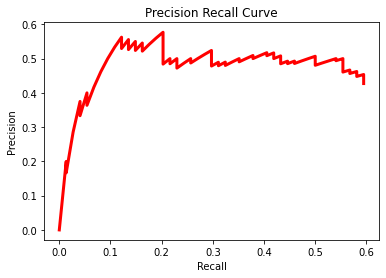

In [ ]:
plot_PR(query_url_pair)